In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Solving Classification probolems using ANN

## Example 1: Building an Artificial Neural Network for Binary Classification on The Heart Dataset

### The Heart Datset

File name: 'D6_Heart_Dataset_2.csv'

This dataset has been obtained from Kaggle.

The dataset contains 303 observations with 13 features and 1 class label with 0 and 1 values.
These features are discussed below:
1. age: in years
2. gender: (1 = male; 0 = female)
3. cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. trestbps: resting blood pressure, in mm Hg on admission to the hospital
5. chol: serum cholestrol in mg/dl
6. fbs: fasting blood sugar, 120 mg.dl (1 = true; 0 = false)
7. restecg: restinng electrocardiographic results (values: 0,1,2)
8. thalach: maximum heart ache achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) coloured by flouroscopy
13. thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: the predicted attribute, diagnosis of heart disease (0 = fit; 1 = diseased)

This is a binary classification problem.
Does not contain any categorical data, the dataset is clean. sed)

In [195]:
#Reading the file into a dataframe
PATH = '/content/drive/MyDrive'
data=pd.read_csv(f'{PATH}/D6_Heart_Dataset_2.csv')

#Displaying the read contents
data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Now apply suitable preprocessing techniques as discussed earlier

In [196]:
# after preprocessing
data=pd.read_csv(f'{PATH}/D6_Heart_Dataset_2.csv')

#Displaying the read contents
data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [197]:
# separating predictors
X_heart = data.drop("target",axis=1)

# separating target
Y_heart = data["target"]

In [198]:
# Splitting the dataset
X_heart_train,X_heart_test,Y_heart_train,Y_heart_test = train_test_split(X_heart,Y_heart,test_size=0.80,random_state=0)

In [199]:
X_heart_train.shape

(60, 13)

### Defining the Neural Network Architecture

- The Sequential class in Keras is used to create neural networks.
- It is a linear stack of layers.
- It allows addition of one layer at a time, and each layer has exactly one input tensor and one output tensor.
- Each layer automatically receives the output of the previous one as its input.
- It is like a blueprint for a building

In [200]:
from keras import models
from keras import layers


# Start neural network
network1 = models.Sequential()
# Adding input layer
network1.add(layers.Input(shape=(13,)))
# Adding fully connected layer with a ReLU activation function
network1.add(layers.Dense(units=16, activation="relu", name='m1_hidden1'))
# Adding fully connected layer with a sigmoid activation function
network1.add(layers.Dense(units=1, activation="sigmoid",name='m1_output'))

network1.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m1_hidden1 (Dense)              │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_output (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [201]:
# Alternate definition
network1 = models.Sequential([layers.Input(shape=(13,)),
                              layers.Dense(units=16, activation="relu", name='m1_hidden1'),
                              layers.Dense(units=1, activation="sigmoid",name='m1_output'),
                             ])
network1.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m1_hidden1 (Dense)              │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_output (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

### Compiling the Neural Network

Once the network is defined, model.compile() does the following:
1. Configures the training process.
2. Binds the loss function to calculate errors.
3. Attaches the optimizer to adjust weights based on the loss.
4. Prepares the model to track specified metrics during training.

In [202]:
network1.compile(loss="binary_crossentropy",
                 optimizer="rmsprop",
                 metrics=["accuracy"])

# Optional :
add more metrics if you want

In [203]:
network1.compile(loss="binary_crossentropy",
                 optimizer="rmsprop",
                 metrics=["accuracy", "precision"]) # note that precision is added

### Training the Neural Network

In [204]:
#Setting some hyperparameters
batch_size = 5
nr_epochs = 50

# Batch Size
- Batch siza is a hyper parameter that defines the number of sampoles to work
trough before updating weights.

# Epoch
- An epoch is when entire dataset is passed through teh netowrk single time.

In [205]:
%%time
history1=network1.fit(X_heart_train, Y_heart_train,
                      batch_size=batch_size,
                      epochs=nr_epochs, verbose=0,
                      validation_data=(X_heart_test,Y_heart_test))

CPU times: user 11.1 s, sys: 524 ms, total: 11.6 s
Wall time: 10.7 s


### Plotting the Learning Curves

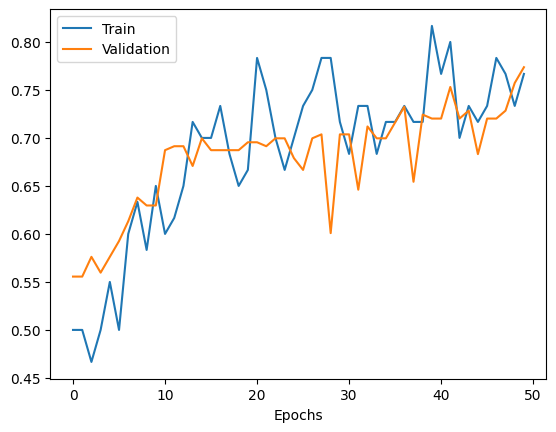

In [206]:
#Plotting the learning curves for train and test accuracy
plt.plot(history1.history['accuracy'], label='Train')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.xlabel("Epochs")
plt.legend()
plt.show()

# Optional
- run if precision was added to metrcis list
- you may add more metrics and plot for better visualization

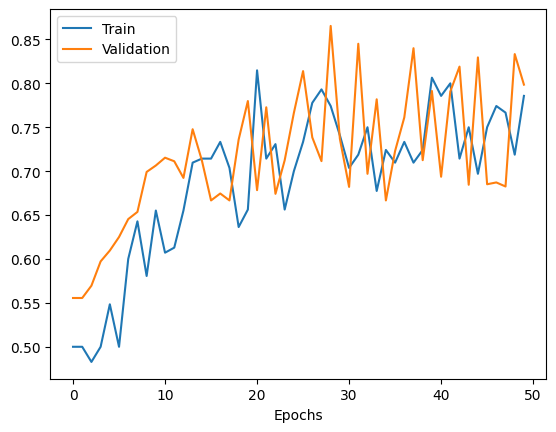

In [207]:
#Plotting the learning curves for train and test accuracy
plt.plot(history1.history['precision'], label='Train')
plt.plot(history1.history['val_precision'], label='Validation')
plt.xlabel("Epochs")
plt.legend()
plt.show()

# Plotting Vlidation Loss

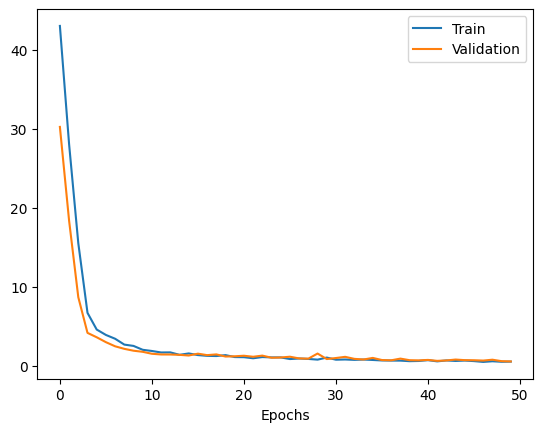

In [208]:
#Plotting the learning curves for train and test loss
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Validation')
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Evaluating the Neural Network

In [209]:
train_loss1, train_accuracy1, train_precision1 = network1.evaluate(X_heart_train, Y_heart_train)
print(f'Train loss is {train_loss1:0.3}')
print(f'Train accuracy is {train_accuracy1:0.1%}')
print(f'Train precision is {train_precision1:0.1%}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7833 - loss: 0.3934 - precision: 0.7840
Train loss is 0.371
Train accuracy is 80.0%
Train precision is 78.1%


In [210]:
test_loss1, test_accuracy1, test_precision1 = network1.evaluate(X_heart_test, Y_heart_test)
print(f'Test loss is {test_loss1:0.3}')
print(f'Test accuracy is {test_accuracy1:0.1%}')
print(f'Test precision is {test_precision1:0.1%}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6724 - loss: 0.7728 - precision: 0.7764 
Test loss is 0.819
Test accuracy is 67.5%
Test precision is 78.0%


# Querying  the ANN

In [211]:
# prepare the query in suitable format
query = np.array([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 0, 2]])
# prediction will be probability if you used sigmoid activation in the last layer
prob = network1.predict(query)

# Convert probability to class (0 or 1) using threshold 0.5
prediction = (prob > 0.5).astype("int32")

print("Predicted probability:", prob[0][0])
print("Predicted class:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted probability: 0.87257516
Predicted class: 1
